In [1]:
using PyPlot
using Sundials

In [24]:
function f(t, g, gdot)
    # Extract the position and velocity vectors from the g array
    r0, v0 = g[1:2], g[3:4]
    r1, v1 = g[5:6], g[7:8]
    r2, v2 = g[9:10], g[11:12]
    
    # The derivatives of the position are simply the velocities
    dr0 = v0
    dr1 = v1
    dr2 = v2
    
    # Now calculate the the derivatives of the velocities, which are the accelarations
    # Start by calculating the distance vectors between the bodies (assumes m0, m1 and m2 are global variables)
    # Slightly rewriten the expressions dv0, dv1 and dv2 comprared to the normal equations so we can reuse d0, d1 and d2
    d0  = norm(r0)^1.0
    #d0  = (r2 - r1) / ( norm(r2 - r1)^3.0 )
    d1  = (r0 - r2) / ( norm(r0 - r2)^3.0 )
    d2  = (r1 - r0) / ( norm(r1 - r0)^3.0 )    
    
    dv0 = d0*m0
    #dv0 = m1*d2 - m2*d1
    dv1 = m2*d0 - m0*d2
    dv2 = m0*d1 - m1*d0
    
    # Reconstruct the derivative vector
    gdot[:] = [dr0; dv0; dr1; dv1; dr2; dv2]
end;

In [25]:
# Masses of the bodies
m0 = 5.0
m1 = 4.0
m2 = 3.0

# Initial positions and velocities of each body (x0, y0, vx0, vy0) 
gi0 = [ 1.0; -1.0; 0.0; 0.0]
gi1 = [ 1.0;  3.0; 0.0; 0.0]
gi2 = [-2.0; -1.0; 0.0; 0.0]

# Simulation from time t=0 to t=30
tf  = 30.0
dt  = 500
t   = collect(linspace(0.0, tf, round(Int,tf*dt)))
g0  = [gi0; gi1; gi2]
res = Sundials.cvode(f, g0, t, reltol=1e-10)

# Extract the position and velocity vectors from the solution
r0, v0, r1, v1, r2, v2 = res[:,1:2], res[:,3:4], res[:,5:6], res[:,7:8], res[:,9:10], res[:,11:12]

# Calculate the center of mass
cx = [(r0[i,1]*m0 + r1[i,1]*m1 + r2[i,1]*m2) / (m0 + m1 + m2) for i=1:length(t)]
cy = [(r0[i,2]*m0 + r1[i,2]*m1 + r2[i,2]*m2) / (m0 + m1 + m2) for i=1:length(t)]

# Write the results to file if we want to do something with them later on (e.g., create some videos)
# writecsv("results.csv", res);

LoadError: [91mDimensionMismatch("tried to assign 11 elements to 12 destinations")[39m

In [22]:
function plot_trajectory(t1, t2)
    t1i = round(Int,(length(t)-1) * t1/tf) + 1
    t2i = round(Int,(length(t)-1) * t2/tf) + 1
    
    # Plot the initial and final positions
    # In these vectors, the first coordinate will be X and the second Y
    X = 1
    Y = 2
    
    figure(figsize=(6,6))
    plot(r0[t1i,X], r0[t1i,Y], "ro")
    plot(r0[t2i,X], r0[t2i,Y], "rs")
    plot(r1[t1i,X], r1[t1i,Y], "go")
    plot(r1[t2i,X], r1[t2i,Y], "gs")
    plot(r2[t1i,X], r2[t1i,Y], "bo")
    plot(r2[t2i,X], r2[t2i,Y], "bs")
    
    # Plot the trajectories
    plot(r0[t1i:t2i,X], r0[t1i:t2i,Y], "r-")
    #plot(r1[t1i:t2i,X], r1[t1i:t2i,Y], "g-")
    #plot(r2[t1i:t2i,X], r2[t1i:t2i,Y], "b-")
    
    # Plot cente of mass
    plot(cx[t1i:t2i], cy[t1i:t2i], "kx")
    
    # Setup the axis and titles
    xmin = minimum([r0[t1i:t2i,X]; r1[t1i:t2i,X]; r2[t1i:t2i,X]]) * 1.10
    xmax = maximum([r0[t1i:t2i,X]; r1[t1i:t2i,X]; r2[t1i:t2i,X]]) * 1.10
    ymin = minimum([r0[t1i:t2i,Y]; r1[t1i:t2i,Y]; r2[t1i:t2i,Y]]) * 1.10
    ymax = maximum([r0[t1i:t2i,Y]; r1[t1i:t2i,Y]; r2[t1i:t2i,Y]]) * 1.10
    
    axis([xmin, xmax, ymin, ymax])
    title(@sprintf "3-body simulation for t=[%.1f .. %.1f]" t1 t2)
end;

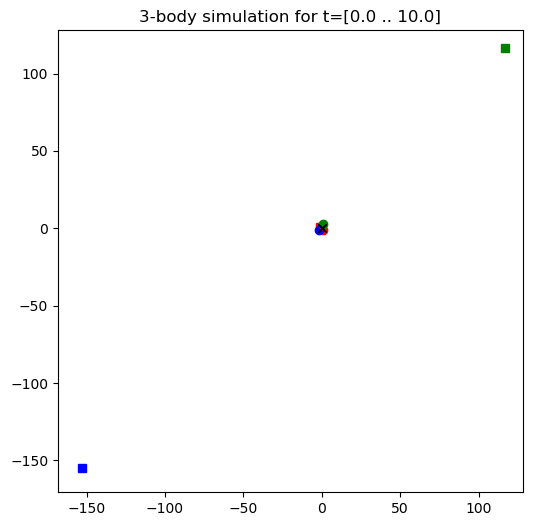

In [23]:
plot_trajectory(0, 10);

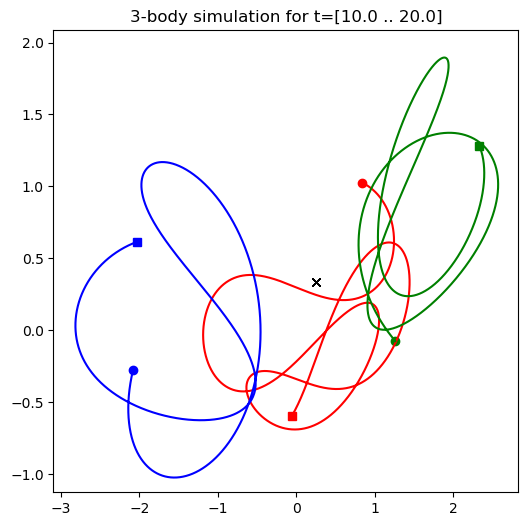

In [7]:
plot_trajectory(10, 20);

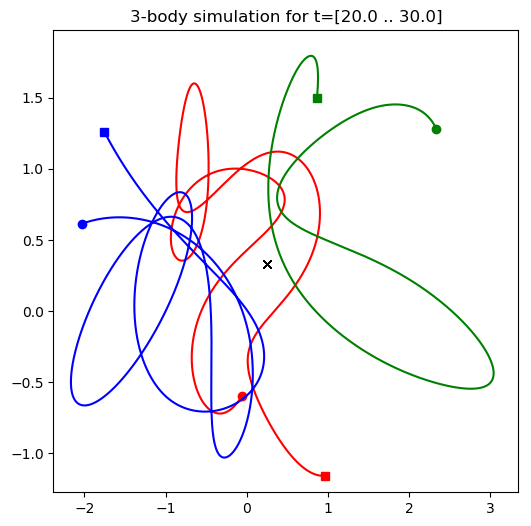

In [8]:
plot_trajectory(20, 30);

In [9]:
# Function for creating an embedded video given a filename
function html_video(filename)
    base64_video = base64encode(open(readbytes, filename))
    """<video controls src="data:video/x-m4v;base64,$base64_video">"""
end

videos = [html_video(v) for v=[
    "imgs/3d_body_0_30_small.mp4";
    "imgs/3d_body_0_10_small.mp4";
    "imgs/3d_body_10_20_small.mp4";
    "imgs/3d_body_20_30_small.mp4"]]

table = """
    <table>
        <tr>  <td>$(videos[1])</td>  <td>$(videos[2])</td>  </tr>
        <tr>  <td>$(videos[3])</td>  <td>$(videos[4])</td>  </tr>
    </table>"""

display("text/html", table)

LoadError: [91mUndefVarError: readbytes not defined[39m